In [1]:
import ModelWorking

In [2]:
ModelWorking.preprocess_user_message("Hello World!")

array([0, 0, 0, ..., 0, 0, 0])

In [3]:
conversation = [
  {
    "role": "system",
    "content": "You are a therapist chatbot. The user will describe their feelings or situation to you. Respond to them as a therapist and continue the session by asking the next question whenever necessary."
  },
  {
    "role": "assistant",
    "content": "Welcome! How are you feeling today?"
  },
  {
    "role": "user",
    "content": "Hi. I've been struggling a lot lately. I just can't shake this feeling of emptiness and sadness."
  },
  {
    "role": "assistant",
    "content": "Maybe if you start to reflect on what is going on in your life, especially any recent situations or decisions, you will start to feel more full.Since you're sad, most likely you need to be patient with how long this feeling lasts. Also, the feeling of emptiness can motivate you to find new situations and relationships to fill this in."
  },
  {
    "role": "user",
    "content": "I don't enjoy anything anymore. Even things I used to love doing just feel meaningless now. I feel exhausted all the time, and it's hard to even get out of bed in the morning."
  },
  {
    "role": "assistant",
    "content": "Maybe you are depressed.The good news about being depressed is that you can be aware of how you feel. This is the first step to finding new ways to be and new paths to go!"
  },
  {
    "role": "user",
    "content": "What do you mean?"
  },
  {
    "role": "assistant",
    "content": "\"Depression\" is a general term which describes a feeling of low energy and of being somewhat lost in direction of life. It is a very common feeling so people usually know what you mean when you say \"depression\".What do you think would help you feel more secure in daily life?This is the direction to go, to understand and know your own particular reasons for feeling depressed, and to address these in a caring and kind way."
  },
  {
    "role": "user",
    "content": "Maybe getting enough sleep and improving my appetite can help me but some nights I can't sleep at all, and other nights I sleep too much and I just don't feel like eating anymore."
  },
  {
    "role": "assistant",
    "content": "Sleep and eating are two of the most basic ways of taking care of yourself. Since life is full of activity, some people require more sleep than others. And some people are so busy taking care of business that they forget to take care of themselves.If you'd like feeling more secure, pay close attention to your own needs and make sure your life includes plenty of time for rest and recuperation from all the daily and major living you do."
  },
  {
    "role": "user",
    "content": "Can you suggest some ways to improve my sleep and appetite?"
  },
  {
    "role": "assistant",
    "content": "If you're taking care of a lot of business and find yourself in a lot of stress then maybe your natural rhythm is to sleep and eat at odd times.If you're able to, then schedule your sleep and eating around the times which are the most conducive for your body to accept.Sleep is very much a part of feeling secure. Concentrate on getting enough sleep and if you're not able to do this, then for improving your appetite, offer yourself gentle foods such as fruit, yogurt, pudding, custard, whatever you feel would be good to eat.Even if you are not able to get more sleep, your body will appreciate the effort to have quality sleep."
  },
  {
    "role": "user",
    "content": "Thank you. I will try to follow some of that advise."
  },
  {
    "role": "assistant",
    "content": "Great! Let me know how you're doing, if you feel like sharing your results and if you would like suggestions on other ways to improve your sleep and appetite!"
  }
]

In [4]:
def get_user_messages(conversation: list):
    user_messages = []
    for dict in conversation:
        if dict["role"] == "user":
            user_messages.append(dict["content"])
    return user_messages


print("User messages:") 
get_user_messages(conversation)

User messages:


["Hi. I've been struggling a lot lately. I just can't shake this feeling of emptiness and sadness.",
 "I don't enjoy anything anymore. Even things I used to love doing just feel meaningless now. I feel exhausted all the time, and it's hard to even get out of bed in the morning.",
 'What do you mean?',
 "Maybe getting enough sleep and improving my appetite can help me but some nights I can't sleep at all, and other nights I sleep too much and I just don't feel like eating anymore.",
 'Can you suggest some ways to improve my sleep and appetite?',
 'Thank you. I will try to follow some of that advise.']

In [5]:
# # define dependency 
# from tensorflow.keras.models import load_model

# # load model 
# model = load_model('sent_clf_model_cc_data.keras')

# # check model info 
# model.summary()

In [6]:
def get_labels(user_messages: list):
    labels_for_messages = []
    for message in user_messages:
        label = ModelWorking.predict_tag_for_user_message(
            ModelWorking.preprocess_user_message(message)
        )[0]["intent"]

        labels_for_messages.append(label)
    
    return labels_for_messages

In [8]:
sentiments = get_labels(get_user_messages(conversation))
sentiments

['depression', 'unknown', 'unknown', 'self-esteem', 'unknown', 'unknown']

In [12]:
import matplotlib.pyplot as plt

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

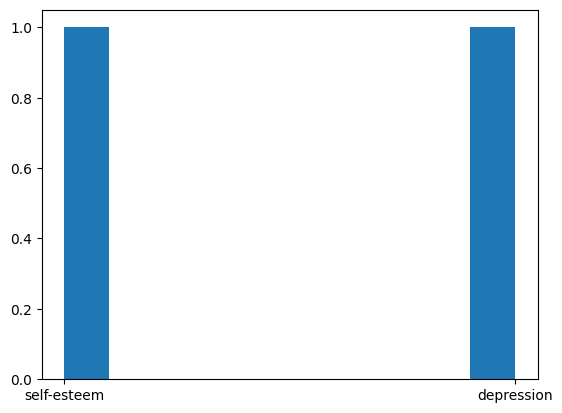

In [13]:
plt.hist(set(sentiments) - set(["unknown"]))

In [2]:
from transformers import pipeline

In [9]:
# !jupyter nbextension enable --py widgetsnbextension

In [10]:
hf_sentiment_classifier = pipeline("text-classification", model='bhadresh-savani/distilbert-base-uncased-emotion')

Some layers from the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing TFDistilBertForSequenceClassification: ['dropout_19']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion and are newly initialized: ['dropout_59']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [11]:
hf_sentiment_classifier("Hello World!")

[{'label': 'joy', 'score': 0.9775402545928955}]

In [1]:
import json

In [ ]:
json.dumps(['depression', 'unknown', 'unknown', 'self-esteem', 'unknown', 'unknown'])

In [2]:
# Convert list to string using json.dumps()
topic_labels_str = json.dumps(['depression', 'unknown', 'unknown', 'self-esteem', 'unknown', 'unknown'])

# Replace " with "" and ' with '' in string
topic_labels_str = topic_labels_str.replace('"', '""')
topic_labels_str = topic_labels_str.replace("'", "''")

topic_labels_str

'[""depression"", ""unknown"", ""unknown"", ""self-esteem"", ""unknown"", ""unknown""]'